# Pre-requisite

In [42]:
!pip list

Package            Version
------------------ -------
appnope            0.1.0  
backcall           0.1.0  
bleach             2.1.4  
cycler             0.10.0 
decorator          4.3.0  
defusedxml         0.5.0  
entrypoints        0.2.3  
html5lib           1.0.1  
ipykernel          4.9.0  
ipython            6.5.0  
ipython-genutils   0.2.0  
ipywidgets         7.4.2  
jedi               0.12.1 
Jinja2             2.10   
jsonschema         2.6.0  
jupyter            1.0.0  
jupyter-client     5.2.3  
jupyter-console    5.2.0  
jupyter-core       4.4.0  
kiwisolver         1.0.1  
MarkupSafe         1.0    
matplotlib         3.0.0  
mistune            0.8.3  
nbconvert          5.4.0  
nbformat           4.4.0  
notebook           5.7.0  
numpy              1.15.1 
pandas             0.23.4 
pandocfilters      1.4.2  
parso              0.3.1  
pexpect            4.6.0  
pickleshare        0.7.4  
pip                18.0   
prometheus-client  0.3.1  
prompt-toolkit     1.0.15 
p

In [3]:
import sys
sys.version

'3.6.6 (v3.6.6:4cf1f54eb7, Jun 26 2018, 19:50:54) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

# Loading Data

In [4]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import os
import numpy as np

def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        # Note that f-string is not supported without MagicPython package
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

# Loading data
train_df = load_df('input/train.csv')
test_df = load_df('input/test.csv')

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)


In [5]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [6]:
test_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [7]:
set(train_df.columns)-set(test_df.columns)

{'totals.transactionRevenue', 'trafficSource.campaignCode'}

In [8]:
train_df['trafficSource.campaignCode'].dropna()

61493    11251kjhkvahf
Name: trafficSource.campaignCode, dtype: object

In [9]:
train_df.shape

(903653, 55)

### Useless columns

In [10]:
const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]

In [11]:
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [12]:
train_df_clean = train_df.drop(const_cols, axis=1)
train_df_clean.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [13]:
whos

Variable         Type         Data/Info
---------------------------------------
const_cols       list         n=19
json             module       <module 'json' from '/Lib<...>hon3.6/json/__init__.py'>
json_normalize   function     <function json_normalize at 0x10ff17f28>
load_df          function     <function load_df at 0x10fd55510>
np               module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os               module       <module 'os' from '/Users<...>/../lib/python3.6/os.py'>
pd               module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
sys              module       <module 'sys' (built-in)>
test_df          DataFrame           channelGrouping   <...>804684 rows x 53 columns]
train_df         DataFrame           channelGrouping   <...>903653 rows x 55 columns]
train_df_clean   DataFrame           channelGrouping   <...>903653 rows x 36 columns]


In [17]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue

In [23]:
train_df_clean.corr()

,date,visitId,visitNumber,visitStartTime,device.isMobile
date,1.000000,0.880936,0.007536,0.880936,0.146148
visitId,0.880936,1.000000,0.002069,1.000000,0.144332
visitNumber,0.007536,0.002069,1.000000,0.002069,-0.037667
visitStartTime,0.880936,1.000000,0.002069,1.000000,0.144332
device.isMobile,0.146148,0.144332,-0.037667,0.144332,1.000000


In [34]:
train_df_clean['totals.transactionRevenue'] = train_df_clean['totals.transactionRevenue'].fillna('0')

In [36]:
train_df_clean['totals.transactionRevenue'] = train_df_clean['totals.transactionRevenue'].astype(float)

In [37]:
train_df_clean.corr()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.transactionRevenue
date,1.000000,0.880936,0.007536,0.880936,0.146148,0.003188
visitId,0.880936,1.000000,0.002069,1.000000,0.144332,0.002724
visitNumber,0.007536,0.002069,1.000000,0.002069,-0.037667,0.051366
visitStartTime,0.880936,1.000000,0.002069,1.000000,0.144332,0.002724
device.isMobile,0.146148,0.144332,-0.037667,0.144332,1.000000,-0.016555
totals.transactionRevenue,0.003188,0.002724,0.051366,0.002724,-0.016555,1.000000


In [48]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
#train_df_clean.plot.scatter(x='visitNumber',y='totals.transactionRevenue')

ModuleNotFoundError: No module named 'seaborn'

In [49]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 298kB/s ta 0:00:01
    100% |████████████████████████████████| 16.7MB 1.3MB/s ta 0:00:011


In [50]:
import matplotlib.pyplot as plt

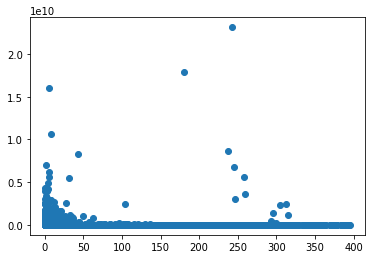

In [54]:
plt.scatter(train_df_clean['visitNumber'],train_df_clean['totals.transactionRevenue'])

In [55]:
train_df_clean[train_df_clean['visitNumber'] <= 50]['totals.transactionRevenue'].mean()

1618204.2090361265

In [56]:
train_df_clean['totals.transactionRevenue'].mean()

1704272.8126836296

In [59]:
train_df_clean.groupby('fullVisitorId').agg({'totals.transactionRevenue':np.mean})

,totals.transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
0000027376579751715,0.0
0000039460501403861,0.0
0000040862739425590,0.0
000005103959234087,0.0
0000062267706107999,0.0
0000068403966359845,0.0
0000085059828173212,0.0


In [60]:
train_df_clean[train_df_clean['visitNumber'] <= 50].groupby('fullVisitorId').agg({'totals.transactionRevenue':np.mean})

,totals.transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
0000027376579751715,0.0
0000039460501403861,0.0
0000040862739425590,0.0
000005103959234087,0.0
0000062267706107999,0.0
0000068403966359845,0.0
0000085059828173212,0.0


In [ ]:
train_df_agg = pd.concat([fd_new1,pd.get_dummies(fd_new1['sub_category'], prefix=['sub_category',''])],axis=1)

In [62]:
train_df_clean['visitStartTime'][0]

1472830385

In [63]:
from datetime import datetime

In [68]:
print(datetime.utcfromtimestamp(train_df_clean['visitStartTime'][0]).strftime('%Y-%m-%d %H:%M:%S'))

2016-09-02 15:33:05
